# Árvore de Decisão

Uma árvore de decisão é um algoritmo de aprendizado de máquina supervisionado que é utilizado para classificação e para regressão. Isto é, pode ser usado para prever categorias discretas (sim ou não, por exemplo) e para prever valores numéricos (o valor do lucro em reais).

Assim como um fluxograma, a árvore de decisão estabelece nós (decision nodes) que se relacionam entre si por uma hierarquia. Existe o nó-raiz (root node), que é o mais importante, e os nós-folha (leaf nodes), que são os resultados finais. No contexto de machine learning, o raiz é um dos atributos da base de dados e o nó-folha é a classe ou o valor que será gerado como resposta.

![](https://www.hashtagtreinamentos.com/wp-content/uploads/2022/11/Arvore-de-Decisao-1.png.webp)

A árvore de decisão é uma representação, uma estrutura. Isso quer dizer que somente a árvore não é Aprendizado de Máquinas. O que é Machine Learning é a escolha dessas regras para a criação da árvore.

Existem diferentes algoritmos usados para isso, como o ID3, C4.5, C5.0 e CART.

https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

O scikit-learn, segundo a própria documentação, usa uma versão otimizada do CART (Classification and Regression Trees).

Em resumo, a seleção dos nós é feita escolhendo qual recurso e limite vai tornar os próximos passos o mais homogêneo possível.

Como podemos criar vários nós para a árvore, é um modelo que facilmente pode sofrer *overfitting*. Quanto mais nós e folhas, maior a complexidade da árvore e menor sua capacidade de generalizar.

**OBS**: O *overfitting* seria uma classificação “perfeita” por não termos muitas informações ou até mesmo por utilizarmos sempre a mesma base de dados, então o modelo fica tão bom que acaba “decorando” os resultados, o que não é bom!



---
### **1. Importando e processando os dados**
Para nosso exemplo de Árvore de Decisão, vamos utilizar o *dataset* **Íris**, que contém dados de três variações morfológicas da flor Íris, ou seja, vamos criar um modelo de árvore de decisão que nos ajude a prever qual é o "tipo" de Iris.


![](https://www.sakurai.dev.br/assets/images/posts/2018-10-17-classificacao-iris-01.png)

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()

# transformando em DataFrame
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


A coluna ***target*** mostra quais são as plantas que estamos querendo classificar, então temos 0 (setosa), 1 (versicolor) e 2 (virginica). Isso quer dizer que temos no total 3 plantas para serem classificadas.

As espécies são representadas por números na coluna **target**. Vamos colocar seus nomes para ficar mais clara a compreensão e para demonstrarmos a versatilidade deste módelo em lidar predizer variáveis categóricas 

In [2]:
iris['target']=  pd.Categorical.from_codes(iris.target, data.target_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [4]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.target.unique()

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [6]:
iris.target.value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

**Analisando os dados**

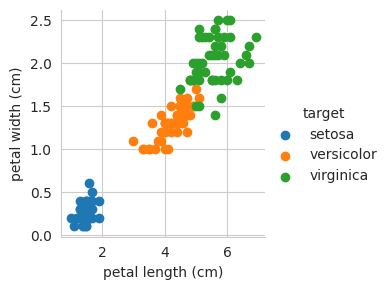

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 

X = iris.drop(['target'], axis=1)
y = iris['target']

sns.set_style('whitegrid')
sns.FacetGrid(iris, hue='target').map(plt.scatter, 'petal length (cm)', 'petal width (cm)').add_legend()

plt.show()

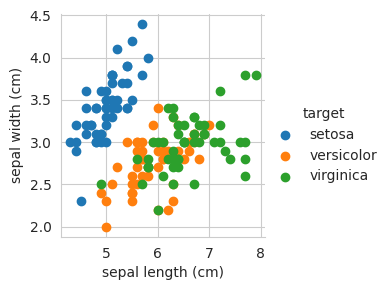

In [9]:
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue='target').map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)').add_legend()

plt.show()

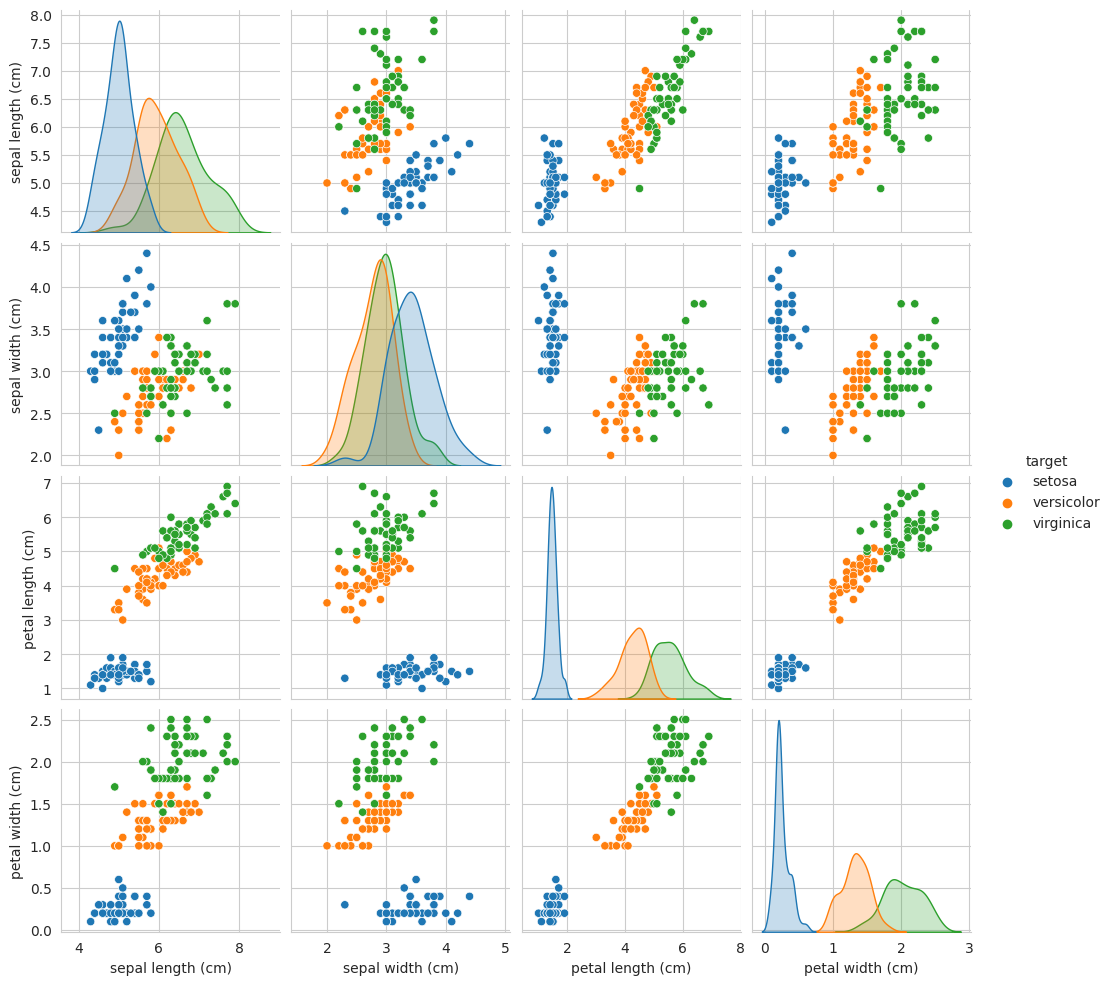

In [10]:
sns.set_style('whitegrid')
sns.pairplot(iris, hue='target')
plt.show()

### **2. Criando nosso modelo de Árvore de Decisão**

In [11]:
# Importando a biblioteca de árvore de e score de validação cruzada do scikit learn
from sklearn import tree
from sklearn.model_selection import cross_val_score


In [12]:
# Criando o nosso classificador
clf = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=2, random_state=42)

# fazendo o fit com os todos dados 
clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

**Vamos "ver" nossa árvore de decisão?**

In [13]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: versicolor
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: virginica



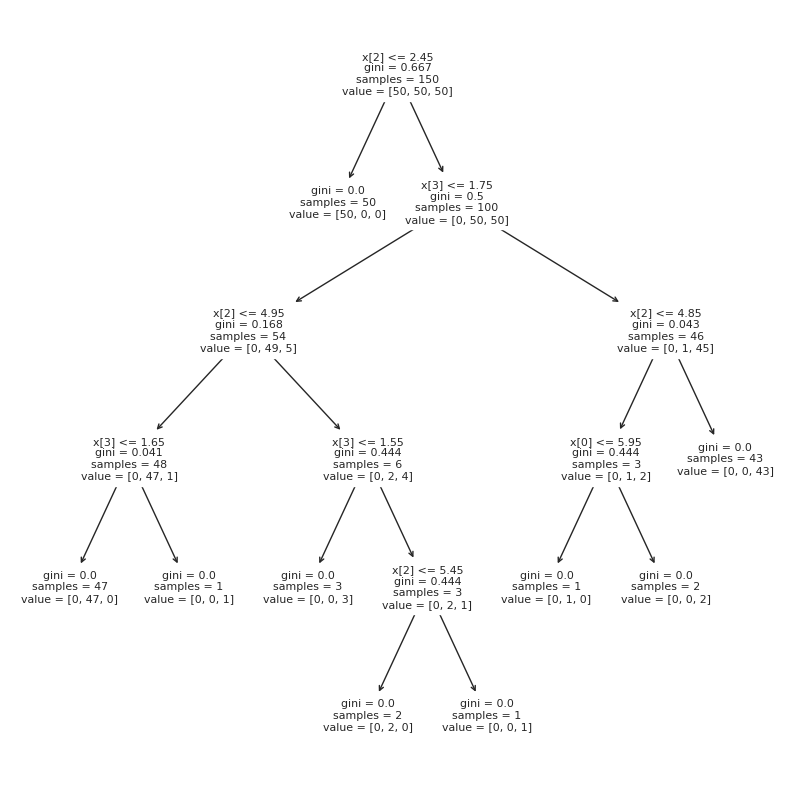

In [14]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf)
plt.show()

Quer deixar mais "bunitinho"? 

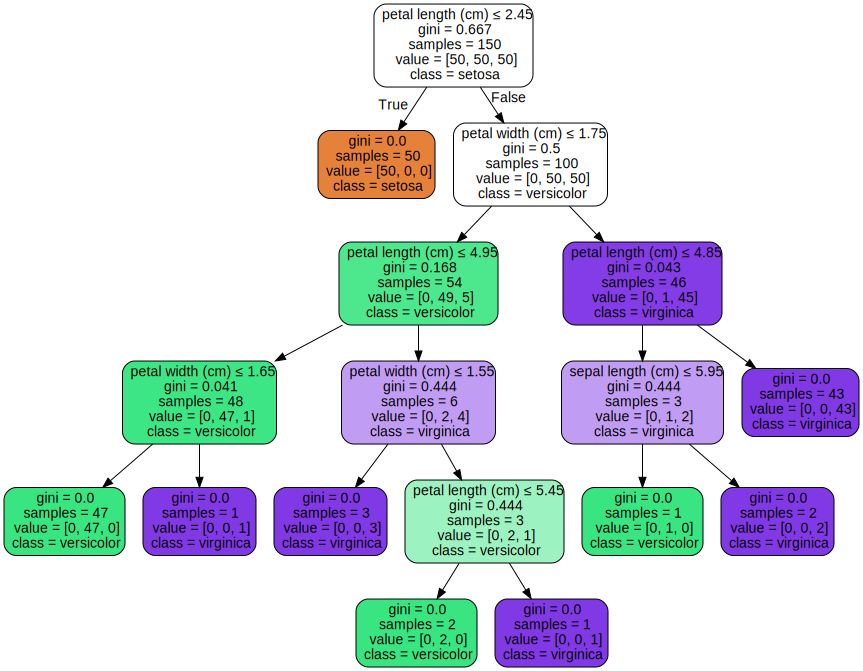

In [15]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=X.columns,  
                      class_names=y.unique().astype('str').tolist(),  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### **3. Validando o modelo**



**Cross Validation** é um método de reamostragem que usa diferentes partes dos dados para testar e treinar um modelo em diferentes iterações. É usado principalmente em configurações onde o objetivo é a previsão e se deseja estimar com que precisão um modelo preditivo será executado na prática.

A base será divida em várias partes, também chamado de *folds*, se dividirmos a base em 5 *folds*, usaremos 4 para treinar e 1 para validar. Mas diferente do formato anterior, não faremos isso apenas uma vez, mas 5 vezes, cada um dos folds será usado para validar enquanto treina com os outros 4, no fim a média desses 5 treinamentos é o resultado do modelo. Dessa forma garantimos que todos foram usados no treinamento e também que todos foram validados sem terem entrado no treinamento.


![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1920px-K-fold_cross_validation_EN.svg.png)


In [16]:
scores_dt = cross_val_score(clf, X, y,
                            scoring='accuracy', cv=5)

print(scores_dt.mean())

0.9533333333333334


### **4. Fazendo Predições**

Vamos testar novos pontos:

In [17]:
Test_point = [[5.4,3.0,4.5,1.5],
             [6.5,2.8,4.6,1.5],
             [5.1,2.5,3.0,1.1],
             [5.1,3.3,1.7,0.5],
             [6.0,2.7,5.1,1.6],
             [6.0,2.2,5.0,1.5]]

print(clf.predict(Test_point))

['versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'virginica']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


---
fontes:
* https://pt.wikipedia.org/wiki/Aprendizagem_de_%C3%A1rvore_de_decis%C3%A3o
* https://www.hashtagtreinamentos.com/arvore-decisao-ciencia-dados
* https://www.linkedin.com/pulse/%C3%A1rvore-de-decis%C3%A3o-em-python-eduardo-fernandes-henriques?trk=pulse-article_more-articles_related-content-card
* https://pt.wikipedia.org/wiki/Conjunto_de_dados_flor_Iris
https://medium.com/analytics-vidhya/iris-data-prediction-using-decision-tree-algorithm-7948fb68201b
* http://carlosbaia.com/2016/12/24/decision-tree-e-random-forest/